<a href="https://colab.research.google.com/github/gomathiaravindan/Machine_Learning/blob/main/1818121_Exp_no11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
 
import os
#print(os.listdir("../input"))

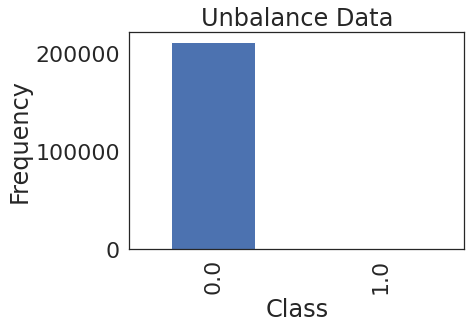

The number of normal transactions(Class 0) are:  211595
The number of fraudulent transactions(Class 1) are:  394
Class 0 percentage =  99.81414129978442
Class 1 percentage =  0.1858587002155772
X_train.shape:  (158992, 30)
X_test.shape:  (52998, 30)
y_train.shape:  (158992,)
y_test.shape:  (52998,)
-----------------------------------------------------------------------------------
                                Support Vector Machine                             
-----------------------------------------------------------------------------------


NotFittedError: ignored

In [ ]:
data = pd.read_csv("creditcard.csv")

#Show the unbalace of the data 
count = pd.value_counts(data['Class'], sort = True).sort_index()
count.plot(kind = 'bar')
plt.title('Unbalance Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

'''
Dataset is highly unbalanced and is understandable. 
Class 0 represents the normal transactions
Class 1 represents the fraudulent transactions
'''
No_of_frauds= len(data[data["Class"]==1])
No_of_normals = len(data[data["Class"]==0])
total= No_of_frauds + No_of_normals
Fraud_percent= (No_of_frauds / total)*100
Normal_percent= (No_of_normals / total)*100

print("The number of normal transactions(Class 0) are: ", No_of_normals)
print("The number of fraudulent transactions(Class 1) are: ", No_of_frauds)
print("Class 0 percentage = ", Normal_percent)
print("Class 1 percentage = ", Fraud_percent)

#Resampleing the dataset
data['normAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
X=data.drop(['Time','Amount'],axis=1)
y=data['Class']

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

# show the dimensions of the train/test data
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

# Applying SVM Algorithm
print("-----------------------------------------------------------------------------------")
print("                                Support Vector Machine                             ")              
print("-----------------------------------------------------------------------------------")

#Using the rbf kernel to build the initail model.
classifier= svm.SVC(C= 1, kernel= 'linear', random_state= 0)

#Fit into Model
classifier.fit(X_train, y_train)

#Predict the class using X_test
y_pred = classifier.predict(X_test)

con_mat = confusion_matrix(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
cls_report = classification_report(y_test, y_pred)

print("*****************************************************************")
print("Area under the curve : %f" % (roc_auc_score(y_test, y_pred)))
print("Average precision-recall score RF: {}".format(average_precision))
print(con_mat)
print(cls_report)
print("*****************************************************************")

def confus_matrix(CM):
    fig, ax = plot_confusion_matrix(conf_mat= CM)
    plt.title("The Confusion Matrix of full dataset using best_parameters")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    print("The accuracy is "+str((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100) + " %")
    print("The recall from the confusion matrix is "+ str(CM[1,1]/(CM[1,0] + CM[1,1])*100) +" %")
confus_matrix(con_mat)

precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))